In [20]:
#configuring the path of kaggle file .json type
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
from zipfile import ZipFile
dataset='/content/telco-customer-churn.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


**Importing Dependencies**

In [23]:
#importing the basic libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [85]:
dataset=pd.read_csv('Telco-Customer-Churn.csv')
dataset.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [86]:
dataset.drop('customerID',axis='columns',inplace=True)

In [87]:
dataset.head(5)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [88]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [89]:
#We see that the TotalCharges param is a object when it should have been a numeric
pd.to_numeric(dataset.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [90]:
dataset[pd.to_numeric(dataset.TotalCharges,errors='coerce').isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [91]:
df=dataset[dataset.TotalCharges!=' ']
df.shape

(7032, 20)

In [92]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

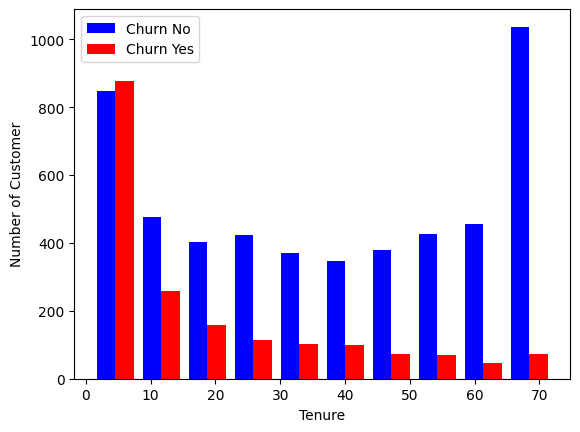

In [93]:
tenureChurnNo=df[df['Churn']=='No'].tenure
tenureChurnYes=df[df['Churn']=='Yes'].tenure
plt.hist([tenureChurnNo,tenureChurnYes],color=['blue','red']);
plt.xlabel('Tenure');
plt.legend(['Churn No','Churn Yes'])
plt.ylabel('Number of Customer');

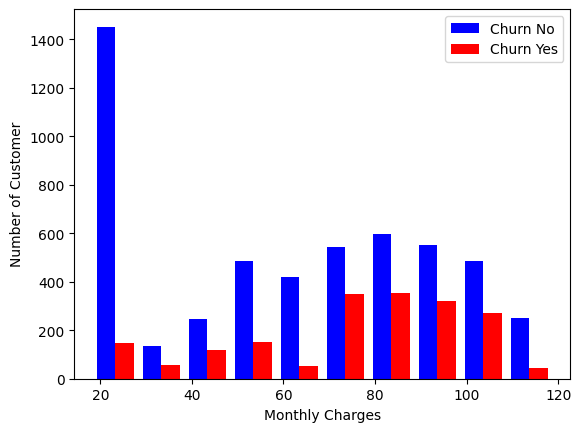

In [94]:
MonChurnNo=df[df['Churn']=='No'].MonthlyCharges
MonChurnYes=df[df['Churn']=='Yes'].MonthlyCharges
plt.hist([MonChurnNo,MonChurnYes],color=['blue','red']);
plt.xlabel('Monthly Charges');
plt.legend(['Churn No','Churn Yes'])
plt.ylabel('Number of Customer');

In [95]:
def printingUniques(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}:{df[column].unique()}')

print(printingUniques(df))

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']
None


Removing elements like `no internet service` with No

In [96]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [97]:
print(printingUniques(df))

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']
None


In [98]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
df.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  Female              0        1           0       1             0   
1    Male              0        0           0      34             1   
2    Male              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             1   
1              0             DSL               1             0   
2              0             DSL               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   

         Contract  PaperlessBilling     PaymentMethod  MonthlyCharges  \
0  Month-to-month                 1  Electronic check           29.85   
1        One year                 0      Mailed check           56.95   
2  Month-to-month                 1      Mailed check           53.85   

   TotalCharges  Churn  
0         29.85      0  
1       1889.50      0  
2        108.15      1

In [99]:
printingUniques(df)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [101]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)
df['gender'].unique()

array([1, 0])

In [103]:
df=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [104]:
df.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  

[3 rows x 27 columns]

We observe how new columns like payment method contract, Internet service have been made using binary codes like zero and one to decide which column is true.

In [105]:
 df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [108]:
!pip install MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement MinMaxScaler (from versions: none)
ERROR: No matching distribution found for MinMaxScaler


In [115]:
# we need to scale the data as tenure, monthly charges, total charges have a high range of values
colsToScale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[colsToScale]=scaler.fit_transform(df[colsToScale])

for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

<h3> `Dataset has been Cleaned` </h3>

In [123]:
# Train Test Split
X=df.drop('Churn',axis='columns')
y=df['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [124]:
print("X shape: {}".format(X.shape))
print('------------------------------------')
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("Y train shape: {}".format(y_train.shape))
print("Y test shape: {}".format(y_test.shape))

X shape: (7032, 26)
------------------------------------
X_train shape: (4922, 26)
X_test shape: (2110, 26)
Y train shape: (4922,)
Y test shape: (2110,)


<h2>Importing Dependencies</h2>

In [129]:
import tensorflow as tf
import keras
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy', #because churn is 0 and 1
              metrics='accuracy')
model.fit(X_train,y_train,epochs=500)

'''we have noticed for 5 epochs we got 80% accuracy
   for 100 epochs we got 84% accuracy
   for 500 epochs we got 87% accuracy 
   which is pretty good and we see how our accuracy increased'''

Epoch 1/500
154/154 [==============================] - 2s 3ms/step - loss: 0.4967 - accuracy: 0.7603
Epoch 2/500
154/154 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8009
Epoch 3/500
154/154 [==============================] - 1s 3ms/step - loss: 0.4179 - accuracy: 0.8027
Epoch 4/500
154/154 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8043
Epoch 5/500
154/154 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8033
Epoch 6/500
154/154 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8074
Epoch 7/500
154/154 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.8100
Epoch 8/500
154/154 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8068
Epoch 9/500
154/154 [==============================] - 1s 3ms/step - loss: 0.4060 - accuracy: 0.8080
Epoch 10/500
154/154 [==============================] - 0s 3ms/step - loss: 0.4042 - accura

'we have noticed for 5 epochs we got 80% accuracy\n   for 100 epochs we got 84% accuracy\n   for 500 epochs we got'

In [131]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.7479


[0.6624436378479004, 0.7478672862052917]

In [137]:
test1=model.predict(X_test)
print(test1[:5])

66/66 [==============================] - 0s 1ms/step
[[1.9263171e-04]
 [3.1379219e-02]
 [5.4105777e-01]
 [1.1959017e-03]
 [2.3135480e-01]]


In [136]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [141]:
'''[[1.9263171e-04]
 [3.1379219e-02]
 [5.4105777e-01]
 [1.1959017e-03]
 [2.3135480e-01]] converting this to 0 or 1 and single dim array'''
y_pred=[]
for element in test1:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [144]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [145]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

##### We can compare how are model is working by looking at the test result and also the predicted result. Not once our model has predicted a wrong answer, so we can say our model is working correctly

In [146]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1549
           1       0.53      0.49      0.51       561

    accuracy                           0.75      2110
   macro avg       0.67      0.66      0.67      2110
weighted avg       0.74      0.75      0.74      2110



<ul>
  <li><strong>Precision:</strong> The precision is the ratio of true positives to the total predicted positives. In other words, it measures the proportion of positive predictions that are actually correct. For class 0, the precision is 0.82, and for class 1, the precision is 0.53.</li>
  <li><strong>Recall:</strong> The recall is the ratio of true positives to the total actual positives. It measures the proportion of actual positive cases that are correctly predicted as positive. For class 0, the recall is 0.84, and for class 1, the recall is 0.49.</li>
  <li><strong>F1-score:</strong> The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. For class 0, the F1-score is 0.83, and for class 1, the F1-score is 0.51.</li>
  <li><strong>Support:</strong> The support is the number of samples in each class. For class 0, the support is 1549, and for class 1, the support is 561.</li>
</ul>

Text(50.722222222222214, 0.5, 'Truth')

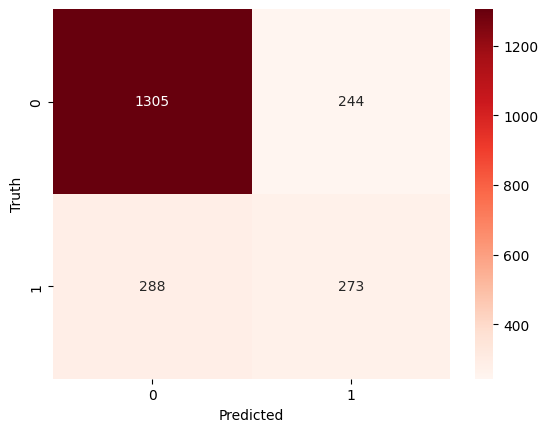

In [149]:
import seaborn as sns
# Assuming y_true and y_pred are the actual and predicted labels respectively
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
# Creating a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

The diagonal data is the correct outputs, so we can see our model made `1305` correct output to predict that the customer will not churn and `288` wrong predix.

Similarly,`273` times it predicted correctly that the customer will churn but `244` times wrongly, which is yet quite surprising thinking about the accuracy score of our model and other params

In [154]:
# So lets do this
print("Accuracy for my model : ",round((1305+273)/(1305+273+288+244)*100),"%")
print("Accuracy score for Class 0 : ",round(1305/(1305+288)*100),"%")
print("Accuracy score for Class 1 : ",round(273/(273+244)*100),"%")

Accuracy for my model :  75 %
Accuracy score for Class 0 :  82 %
Accuracy score for Class 1 :  53 %
